# <font color = green>FREQUENCY DISTRIBUTION </font>
***

The first step in an analysis work is the knowledge of the behavior of the variables involved in the study. Using statistical techniques such as the analysis of <b> FREQUENCY DISTRIBUTIONS </b> and <b> HISTOGRAMS </b> we can better assess how the phenomena under study are distributed.

## <font color = green>Frequency distribution for qualitative variables </font>
***

### First method: https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.Series.value_counts.html

In [2]:
import pandas as pd

data = pd.read_csv('data/data.csv')

data['Sex'].value_counts()

0    53250
1    23590
Name: Sex, dtype: int64

In [3]:
data['Sex'].value_counts(normalize = True) * 100

0    69.299844
1    30.700156
Name: Sex, dtype: float64

In [4]:
frequency = data['Sex'].value_counts()
percentage = data['Sex'].value_counts(normalize = True) * 100

freq_dist_quali = pd.DataFrame({'Frequency': frequency, 'Percentage (%)': percentage })

freq_dist_quali

,Frequency,Percentage (%)
0,53250,69.299844
1,23590,30.700156


In [5]:
freq_dist_quali.rename(index = {0: 'Man', 1: 'Woman'}, inplace=True)
freq_dist_quali.rename_axis('Sex', axis='columns', inplace=True)
freq_dist_quali

Sex,Frequency,Percentage (%)
Man,53250,69.299844
Woman,23590,30.700156


## Second method: https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.crosstab.html

In [6]:
sex = { 0: 'Man ', 1: 'Woman'}

color = { 0: 'Indigenous',
          2: 'White',
          4: 'Black',
          6: 'Yellow',
          8: 'Brown',
          9: 'No declaration'}

In [7]:
frequency = pd.crosstab(data['Sex'], data['Color'])
frequency.rename(index = sex, inplace=True)
frequency.rename(columns = color, inplace=True)
frequency

Color,Indigenous,White,Black,Yellow,Brown
Sex,,,,,
Man,256,22194,5502,235,25063
Woman,101,9621,2889,117,10862


In [8]:
percentage = pd.crosstab(data['Sex'], data['Color'], normalize=True) * 100
percentage.rename(index = sex, inplace=True)
percentage.rename(columns = color, inplace=True)
percentage

Color,Indigenous,White,Black,Yellow,Brown
Sex,,,,,
Man,0.333160,28.883394,7.160333,0.305830,32.617126
Woman,0.131442,12.520822,3.759761,0.152264,14.135867


In [9]:
percentage = pd.crosstab(data['Sex'], data['Color'],
                         aggfunc = 'mean',
                         values = data['Income'])
percentage.rename(index = sex, inplace=True)
percentage.rename(columns = color, inplace=True)
percentage

Color,Indigenous,White,Black,Yellow,Brown
Sex,,,,,
Man,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Woman,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


## <font color = green>Frequency distribution for quantitative variables (custom classes) </font>
***

### Step 1 - Specify the limits for each class

Use the following classification:

<b> A </b> ► Above 20 MW

<b> B </b> ► From 10 to 20 SM

<b> C </b> ► From 4 to 10 SM

<b> D </b> ► From 2 to 4 SM

<b> E </b> ► Up to 2 SM

where <b> SM </b> is the minimum wage at the time. In our case <b> R $ 788.00 </b> (2015):

<b> A </b> ► Above 15,760

<b> B </b> ► From 7,880 to 15,760

<b> C </b> ► From 3,152 to 7,880

<b> D </b> ► From 1,576 to 3,152

<b> E </b> ► Up to 1,576

In [10]:
data['Income'].min()

0

In [11]:
data['Income'].max()

200000

In [13]:
classes = [0, 1576, 3151, 7880, 15760, 200000]
labels = ['E', 'D', 'C', 'B', 'A']

### Step 2 - Create the frequency table

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.cut.html

In [19]:
income_series_cut = pd.cut(x = data['Income'],
        bins = classes,
        labels = labels,
        include_lowest = True)
        
income_series_cut

0        E
1        E
2        E
3        C
4        E
        ..
76835    E
76836    E
76837    E
76838    E
76839    E
Name: Income, Length: 76840, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

In [24]:
frequency = pd.value_counts(income_series_cut)
frequency

E    49755
D    16689
C     7610
B     2178
A      608
Name: Income, dtype: int64

In [25]:
percentage = pd.value_counts(income_series_cut, normalize=True)
percentage

E    0.647514
D    0.217192
C    0.099037
B    0.028345
A    0.007913
Name: Income, dtype: float64

In [27]:
freq_dist_quant = pd.DataFrame({'Frequency': frequency, 'Percentage (%)': percentage * 100})
freq_dist_quant

,Frequency,Percentage (%)
E,49755,64.751432
D,16689,21.719157
C,7610,9.903696
B,2178,2.834461
A,608,0.791255


In [29]:
freq_dist_quant.sort_index(ascending = False)

,Frequency,Percentage (%)
A,608,0.791255
B,2178,2.834461
C,7610,9.903696
D,16689,21.719157
E,49755,64.751432


# Frequency distribution for quantitative variables (fixed amplitude classes)

### Importing libraries

http://www.numpy.org/

In [30]:
import numpy as np

### Step 1 - Defining the number of classes

#### Sturges Rule

# $$k = 1 + \frac {10}{3}\log_{10}n$$

In [33]:
n = len(data)

k = 1 + (10/3) * np.log10(n)
k

17.285291187298853

In [34]:
k = int(k.round(0))
k

17

### Step 2 - Creating the frequency table

In [45]:
frequency = pd.value_counts(
    pd.cut(
        x = data['Income'],
        bins = k,
        include_lowest = True
    ),
    sort = False
)
frequency

(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(82352.941, 94117.647]          1
(94117.647, 105882.353]         6
(105882.353, 117647.059]        0
(117647.059, 129411.765]        1
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
(188235.294, 200000.0]          3
Name: Income, dtype: int64

In [43]:
percentage = pd.value_counts(
    pd.cut(
        x = data['Income'],
        bins = k,
        include_lowest = True
    ),
    sort = False,
    normalize=True
)
percentage

(-200.001, 11764.706]       0.983784
(11764.706, 23529.412]      0.013300
(23529.412, 35294.118]      0.002199
(35294.118, 47058.824]      0.000247
(47058.824, 58823.529]      0.000208
(58823.529, 70588.235]      0.000065
(70588.235, 82352.941]      0.000052
(82352.941, 94117.647]      0.000013
(94117.647, 105882.353]     0.000078
(105882.353, 117647.059]    0.000000
(117647.059, 129411.765]    0.000013
(129411.765, 141176.471]    0.000000
(141176.471, 152941.176]    0.000000
(152941.176, 164705.882]    0.000000
(164705.882, 176470.588]    0.000000
(176470.588, 188235.294]    0.000000
(188235.294, 200000.0]      0.000039
Name: Income, dtype: float64

In [47]:
freq_dist_fixed_amplitude = pd.DataFrame({'Frequency': frequency, 'Percentage (%)': percentage * 100})
freq_dist_fixed_amplitude

,Frequency,Percentage (%)
"(-200.001, 11764.706]",75594,98.378449
"(11764.706, 23529.412]",1022,1.330036
"(23529.412, 35294.118]",169,0.219938
"(35294.118, 47058.824]",19,0.024727
"(47058.824, 58823.529]",16,0.020822
"(58823.529, 70588.235]",5,0.006507
"(70588.235, 82352.941]",4,0.005206
"(82352.941, 94117.647]",1,0.001301
"(94117.647, 105882.353]",6,0.007808
"(105882.353, 117647.059]",0,0.000000


## <font color = green> Histogram </font>
***

The <b> HISTOGRAM </b> is the graphical representation of a frequency distribution. It is a graph formed by a set of rectangles placed side by side, where the area of each rectangle is proportional to the frequency of the class it represents.

# Importing library

https://seaborn.pydata.org/

C:\Users\PedroFerreira\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Frequency distribution - Height'}, xlabel='Metters'>

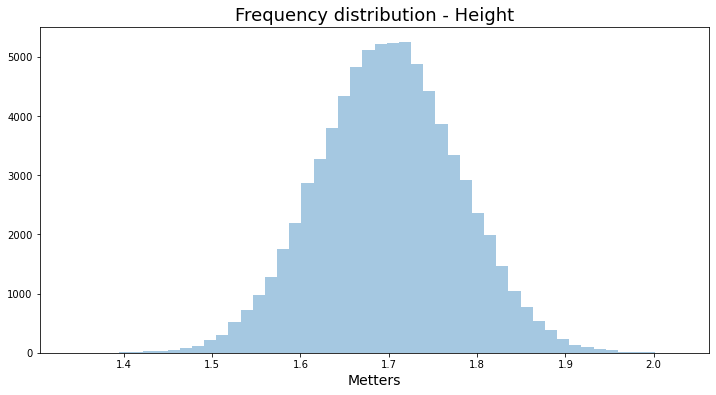

In [49]:
import seaborn as sns

ax = sns.distplot(data['Height'], kde = False)

ax.figure.set_size_inches(12, 6)
ax.set_title('Frequency distribution - Height', fontsize = 18)
ax.set_xlabel('Metters', fontsize = 14)
ax

<AxesSubplot:title={'center':'Frequency distribution - Height - KDE'}, xlabel='Metters', ylabel='Density'>

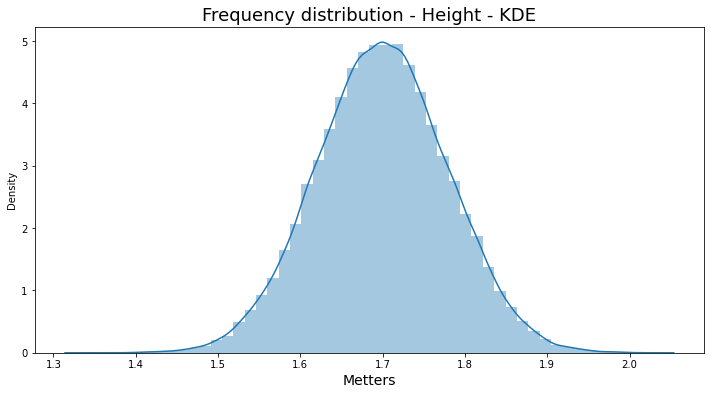

In [50]:
ax = sns.distplot(data['Height'])

ax.figure.set_size_inches(12, 6)
ax.set_title('Frequency distribution - Height - KDE', fontsize = 18)
ax.set_xlabel('Metters', fontsize = 14)
ax

<AxesSubplot:>

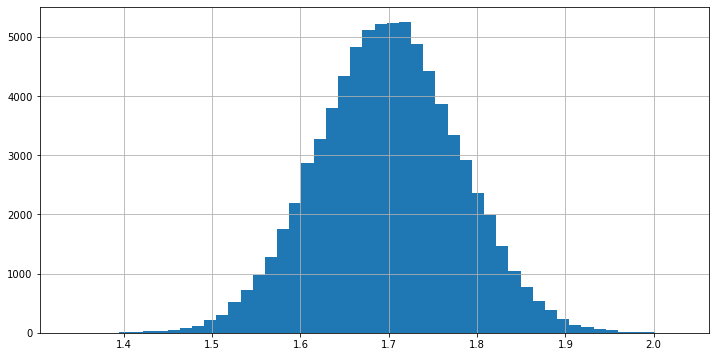

In [52]:
data['Height'].hist(bins = 50, figsize=(12,6))

In [53]:
freq_dist_quant

,Frequency,Percentage (%)
E,49755,64.751432
D,16689,21.719157
C,7610,9.903696
B,2178,2.834461
A,608,0.791255


<AxesSubplot:>

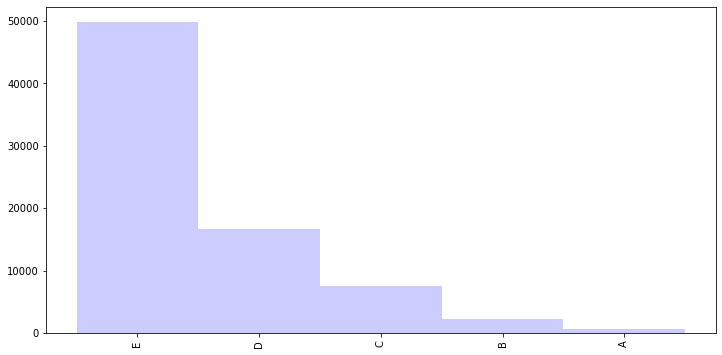

In [55]:
freq_dist_quant['Frequency'].plot.bar(
    width=1,
    color='blue',
    alpha= 0.2,
    figsize=(12,6))